# PLAYING CARDS DATASET CLASSIFICATION

##### Team Members
                 RABHA EMBARAK  |  MOHAMED GAMAL  |   NOUR EL SAMAA  |   ZEINA EL GENDY  |   YUSUF EL KORDY

#### Importing Libraries

In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
import random

#### Setting Up Random Seed

In [15]:
RANDOM_SEED: int = 42

In [16]:
import random
import os
os.environ['PYTHONHASHSEED']= str(RANDOM_SEED)
random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
tf.experimental.numpy.random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

#### Print the number of Directories and Image Files in each directory

In [17]:
import os
for dirpath, dirnames, filenames in os.walk("/Users/rabhaembarak/Downloads/archive (3)"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 8 images in '/Users/rabhaembarak/Downloads/archive (3)'.
There are 53 directories and 0 images in '/Users/rabhaembarak/Downloads/archive (3)/valid'.
There are 0 directories and 5 images in '/Users/rabhaembarak/Downloads/archive (3)/valid/three of hearts'.
There are 0 directories and 5 images in '/Users/rabhaembarak/Downloads/archive (3)/valid/six of spades'.
There are 0 directories and 5 images in '/Users/rabhaembarak/Downloads/archive (3)/valid/ace of spades'.
There are 0 directories and 5 images in '/Users/rabhaembarak/Downloads/archive (3)/valid/ten of diamonds'.
There are 0 directories and 5 images in '/Users/rabhaembarak/Downloads/archive (3)/valid/nine of hearts'.
There are 0 directories and 5 images in '/Users/rabhaembarak/Downloads/archive (3)/valid/queen of clubs'.
There are 0 directories and 5 images in '/Users/rabhaembarak/Downloads/archive (3)/valid/seven of spades'.
There are 0 directories and 5 images in '/Users/rabhaembarak/Downloads/archive (

#### Find the Subfolders (Classes) within the train folder

In [18]:
import pathlib
data_dir = pathlib.Path("/Users/rabhaembarak/Downloads/archive (3)/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])).tolist() # created a list of class_names from the subdirector
class_names

['ace of clubs',
 'ace of diamonds',
 'ace of hearts',
 'ace of spades',
 'eight of clubs',
 'eight of diamonds',
 'eight of hearts',
 'eight of spades',
 'five of clubs',
 'five of diamonds',
 'five of hearts',
 'five of spades',
 'four of clubs',
 'four of diamonds',
 'four of hearts',
 'four of spades',
 'jack of clubs',
 'jack of diamonds',
 'jack of hearts',
 'jack of spades',
 'joker',
 'king of clubs',
 'king of diamonds',
 'king of hearts',
 'king of spades',
 'nine of clubs',
 'nine of diamonds',
 'nine of hearts',
 'nine of spades',
 'queen of clubs',
 'queen of diamonds',
 'queen of hearts',
 'queen of spades',
 'seven of clubs',
 'seven of diamonds',
 'seven of hearts',
 'seven of spades',
 'six of clubs',
 'six of diamonds',
 'six of hearts',
 'six of spades',
 'ten of clubs',
 'ten of diamonds',
 'ten of hearts',
 'ten of spades',
 'three of clubs',
 'three of diamonds',
 'three of hearts',
 'three of spades',
 'two of clubs',
 'two of diamonds',
 'two of hearts',
 'two o

#### Number of Classes

In [19]:
num_classes: int = len(class_names)
num_classes

53

#### Visualize a Random Image From the Train Set

Image shape: (224, 224, 3)


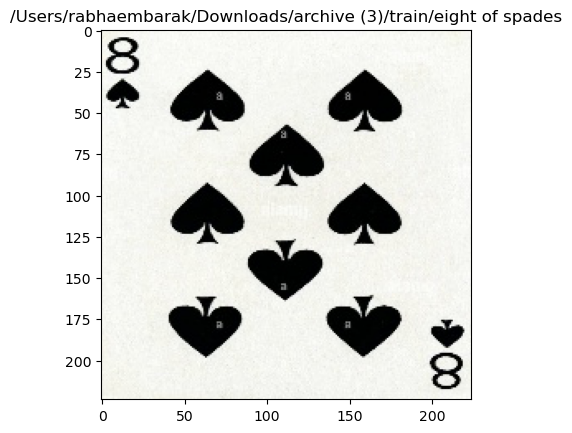

In [20]:
# visualize random image from train set
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

target_class = random.choice(class_names)
target_folder: str = "/Users/rabhaembarak/Downloads/archive (3)/train/" + random.choice(class_names)

# Get a random image path
random_image = random.sample(os.listdir(target_folder), 1)

# Read in the image and plot it using matplotlib
img = mpimg.imread(target_folder + "/" + random_image[0])
plt.imshow(img)
plt.title(target_folder)

print(f"Image shape: {img.shape}")

#### Define Variables and Directories 

In [21]:
BATCH_SIZE: int = 32
EPOCHS: int = 100
AUGMENTATION_FACTOR: int = 0.1
LABEL_MODE: str = "categorical"
IMAGE_SIZE: tuple = (200, 200)

TRAIN_DIR: str = "/Users/rabhaembarak/Downloads/archive (3)/train"
TEST_DIR: str = "/Users/rabhaembarak/Downloads/archive (3)/test"
VALIDATION_DIR: str = "/Users/rabhaembarak/Downloads/archive (3)/valid"

#### Generate datasets from the train and valid directories

In [22]:
print("training set:")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=TRAIN_DIR,
    batch_size=BATCH_SIZE,
    label_mode=LABEL_MODE,
    image_size=IMAGE_SIZE,
    seed=RANDOM_SEED,
    shuffle=True
)

print("validation set:")
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=VALIDATION_DIR,
    batch_size=BATCH_SIZE,
    label_mode=LABEL_MODE,
    image_size=IMAGE_SIZE,
    seed=RANDOM_SEED,
    shuffle=False
)



training set:
Found 7624 files belonging to 53 classes.
validation set:
Found 265 files belonging to 53 classes.


#### Create an augmentation layer using TensorFlow
*The augmentation layer applies various random transformations to the input images to enhance the diversity and variability of the training data*

In [23]:
from tensorflow.keras.layers import Dense, RandomFlip, RandomRotation, RandomHeight, RandomWidth, RandomZoom, Rescaling
from tensorflow.keras import Sequential

# Create an augmentation layer
augmentation_layer = Sequential([
    
        # Flip the input images horizontally
    RandomFlip("horizontal", seed=RANDOM_SEED),
    
        # Rotate the input images by a random angle within the specified range
    RandomRotation(AUGMENTATION_FACTOR, seed=RANDOM_SEED),
    
        # Apply random zooming to the input images
    RandomZoom(AUGMENTATION_FACTOR, seed=RANDOM_SEED),
    
        # Randomly adjust the height of the input images
    RandomHeight(AUGMENTATION_FACTOR, seed=RANDOM_SEED),
    
        # Randomly adjust the width of the input images
    RandomWidth(AUGMENTATION_FACTOR, seed=RANDOM_SEED),

], name="augmentation_layer")
augmentation_layer


#### Visualize a random image and compare it with an augmented version

/Users/rabhaembarak/Downloads/archive (3)/train/five of clubs/061.jpg


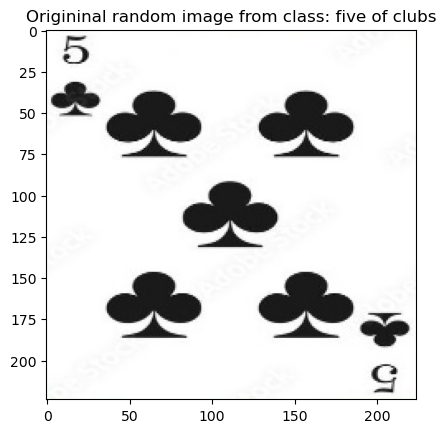

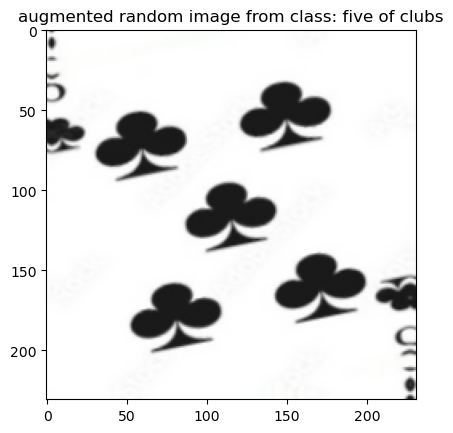

In [26]:
target_dir = "/Users/rabhaembarak/Downloads/archive (3)/train"
target_class = random.choice(class_names)
target_dir = f"{target_dir}/{target_class}"
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

print(random_image_path)
# Read in the random image
img = mpimg.imread(random_image_path)
plt.title(f"Origininal random image from class: {target_class}")
# plt.axis(False)
plt.imshow(img);

# Now lets plot our augmented random image
augmented_image = augmentation_layer(img, training=True)
plt.figure()
plt.title(f"augmented random image from class: {target_class}")
plt.imshow(tf.cast(augmented_image, tf.float32)/255.)

# EfficientNetB0

In [27]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# set seed
tf.random.set_seed(RANDOM_SEED)

#initialize the base_model as the EfficientNetB0 model 
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.training = False

input_layer = tf.keras.layers.Input(shape=IMAGE_SIZE + (3, ), name="input_layer")
x = augmentation_layer(input_layer)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = Dense(256, activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.BatchNormalization()(x)
output_layer = Dense(len(class_names), activation=tf.keras.activations.softmax)(x)

model = tf.keras.Model(input_layer, output_layer)
model

In [28]:
!pip install pydot
!pip install graphviz

#### Display Model Architecture

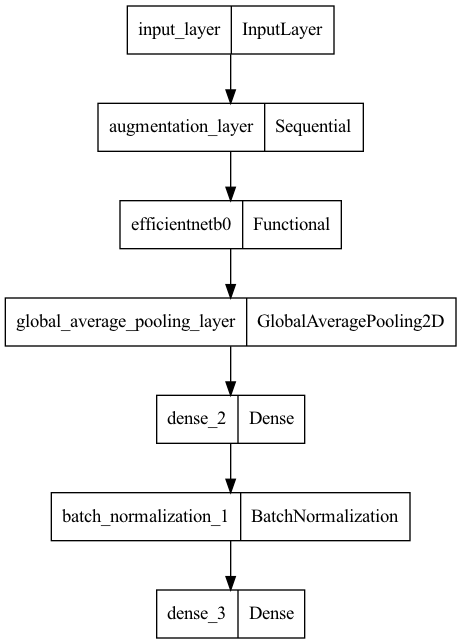

In [29]:
tf.keras.utils.plot_model(model)


In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 200, 200, 3)]     0         
                                                                 
 augmentation_layer (Sequent  (None, None, 3)          0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024

#### Complie the Model

In [31]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)


#### Set EarlyStopping Callback and ReduceLROnPlateau Callback

early_stopping_callback: monitors the validation loss (val_loss) during training and stops the training process if the validation loss does not improve for a certain number of epochs 

reduce_lr_callback: reduces the learning rate (lr) of the optimizer when the validation loss (val_loss) does not improve for a certain number of epochs

In [32]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)


#### Fit the model ---> Start Training  

In [33]:
history_1 = model.fit(
    train_data,
    epochs=EPOCHS,
    steps_per_epoch=len(train_data),
    validation_data= valid_data,
    validation_steps=int(0.15 * len(valid_data)),
    callbacks=[
        early_stopping_callback,
        reduce_lr_callback
    ]
)


Epoch 1/100


2023-06-02 14:10:42.422909: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


239/239 [==============================] - 262s 1s/step - loss: 2.6158 - accuracy: 0.2631 - val_loss: 1.1622 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 2/100
239/239 [==============================] - 269s 1s/step - loss: 1.4435 - accuracy: 0.5867 - val_loss: 1.4323 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 3/100
239/239 [==============================] - 275s 1s/step - loss: 1.0743 - accuracy: 0.7061 - val_loss: 0.5254 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 4/100
239/239 [==============================] - 286s 1s/step - loss: 0.9266 - accuracy: 0.7427 - val_loss: 0.5062 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 5/100
239/239 [==============================] - 319s 1s/step - loss: 0.8243 - accuracy: 0.7685 - val_loss: 0.4533 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 6/100
239/239 [==============================] - 321s 1s/step - loss: 0.7749 - accuracy: 0.7824 - val_loss: 0.4436 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 7/100
239/239 [==============================] - 306s 1s/step - 

#### Evaluate valid and train results 

In [34]:
model.evaluate(valid_data)


9/9 [==============================] - 2s 247ms/step - loss: 0.1578 - accuracy: 0.9547


[0.15775947272777557, 0.9547169804573059]

In [35]:
model.evaluate(train_data)


239/239 [==============================] - 62s 261ms/step - loss: 0.1906 - accuracy: 0.9435


[0.19064150750637054, 0.9434679746627808]

#### plot  training and validation loss and training and validation accuracy over the epochs

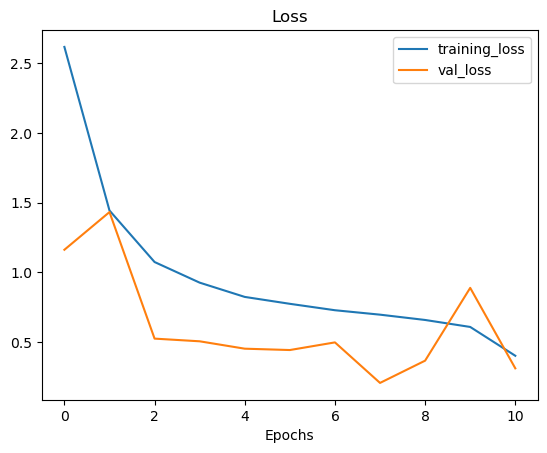

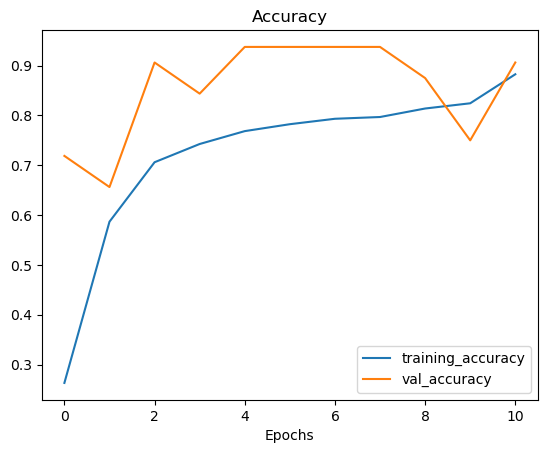

In [36]:
import matplotlib.pyplot as plt
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

accuracy = history_1.history["accuracy"]
val_accuracy = history_1.history["val_accuracy"]

epochs = range(len(history_1.history['loss']))

# Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()


#### Fine-tune: make the base_model trainable while keeping the weights of the first layers frozen

In [37]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# set seed
tf.random.set_seed(RANDOM_SEED)


base_model.trainable = True

for layer in base_model.layers[:-40]:
    layer.trainable = False

In [38]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [39]:
history_1.epoch[-1]

10

#### Continue the training process after fine-tuning

In [40]:
fine_tune_epochs = EPOCHS + 10

history_2 = model.fit(
    train_data,
    epochs=fine_tune_epochs,
    validation_data=valid_data,
    steps_per_epoch=len(train_data),
    validation_steps=int(0.15 * len(valid_data)),
    initial_epoch=history_1.epoch[-1],
    callbacks=[
        early_stopping_callback,
        reduce_lr_callback,
    ]
)

Epoch 11/110
239/239 [==============================] - 86s 346ms/step - loss: 0.3239 - accuracy: 0.9061 - val_loss: 0.3222 - val_accuracy: 0.9062 - lr: 1.0000e-04
Epoch 12/110
239/239 [==============================] - 92s 385ms/step - loss: 0.3059 - accuracy: 0.9102 - val_loss: 0.3142 - val_accuracy: 0.9062 - lr: 1.0000e-04
Epoch 13/110
239/239 [==============================] - 88s 370ms/step - loss: 0.2927 - accuracy: 0.9090 - val_loss: 0.3439 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 14/110
239/239 [==============================] - ETA: 0s - loss: 0.2978 - accuracy: 0.9096
Epoch 14: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
239/239 [==============================] - 94s 395ms/step - loss: 0.2978 - accuracy: 0.9096 - val_loss: 0.3265 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 15/110
239/239 [==============================] - 97s 404ms/step - loss: 0.2782 - accuracy: 0.9155 - val_loss: 0.3221 - val_accuracy: 0.9375 - lr: 2.0000e-05


#### Evaluate performance on valid and train data

In [41]:
model.evaluate(valid_data)


9/9 [==============================] - 2s 245ms/step - loss: 0.1484 - accuracy: 0.9623


[0.14844657480716705, 0.9622641801834106]

In [42]:
model.evaluate(train_data)


239/239 [==============================] - 63s 262ms/step - loss: 0.1356 - accuracy: 0.9584


[0.13557876646518707, 0.9584207534790039]

#### Compare initial model with fine-tuned model

In [43]:

# Let's create a function to compare training histories
def compare_historys(original_history, new_history, initial_epochs=5, metric: str = "accuracy"):
  """
  Compares two TensorFlow History objects.
  """
  # Get original history measurements
  acc = original_history.history[metric]
  loss = original_history.history["loss"]

  val_acc = original_history.history[f"val_{metric}"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with new_history metrics
  total_acc = acc + new_history.history[metric]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history[f"val_{metric}"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plot for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  # Make plot for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

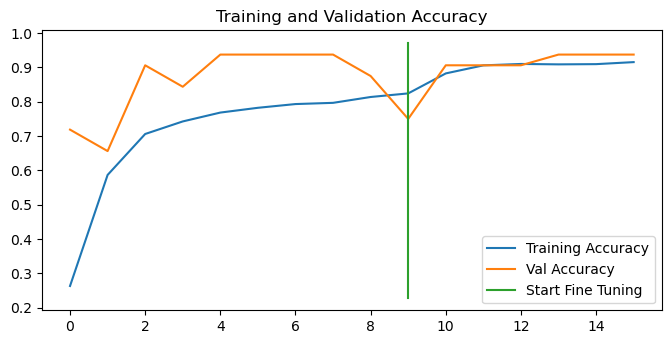

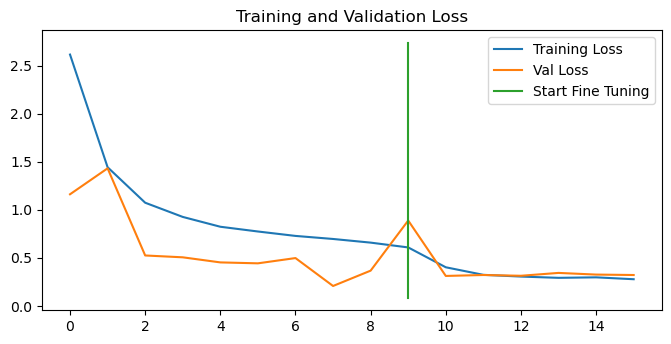

In [44]:
compare_historys(history_1, history_2, initial_epochs=history_1.epoch[-1])

#### Make predictions on validation data

In [45]:
# Make predictions with model
preds_probs = model.predict(valid_data)
preds_probs[:1]

9/9 [==============================] - 3s 245ms/step


array([[6.61601543e-01, 2.27678887e-04, 2.54778238e-03, 3.13580364e-01,
        2.08201504e-06, 8.82093559e-07, 8.84789642e-07, 4.89855738e-05,
        3.35314462e-06, 1.61151911e-06, 3.80303817e-07, 3.15988382e-06,
        2.72806414e-04, 6.73114409e-05, 3.45926674e-05, 9.01951548e-03,
        6.94518152e-04, 2.59661829e-06, 3.16869250e-06, 7.87263489e-05,
        2.65646202e-04, 2.68838066e-03, 1.61882745e-05, 1.23679245e-04,
        2.73767347e-03, 1.11018767e-06, 8.05715814e-08, 5.50052562e-07,
        4.65710542e-07, 7.52128562e-06, 2.60001912e-07, 1.64462676e-06,
        2.93031426e-05, 4.30410309e-03, 3.12778684e-05, 5.75322665e-05,
        1.30964001e-03, 4.90437014e-06, 1.52306905e-06, 5.61538798e-07,
        4.04068214e-06, 2.22610015e-05, 2.27301911e-07, 2.01635385e-06,
        1.84921209e-05, 9.83692371e-06, 7.72646587e-08, 1.17487980e-06,
        1.49736625e-05, 1.12731475e-04, 1.05685911e-06, 4.92984952e-07,
        3.86153552e-05]], dtype=float32)

In [46]:

# Get the pred classes of each label
pred_classes = preds_probs.argmax(axis=1)
pred_classes[:10]

array([ 0,  0, 31,  0,  0,  1,  1,  1,  1,  1])

In [48]:
# To get our test labels we need to unravel our valid_data BatchDataset
y_labels = []
for images, labels in valid_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1, .... 0, 0], we want the index value where the "1" occurs
y_labels[:10] # look at the first 10 

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

#### Get valid data predicition accuracy 

In [49]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true=y_labels,
                                  y_pred=pred_classes)
sklearn_accuracy

0.9622641509433962

#### Define make_confusion_matrix function

In [50]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to make some changes to our make_confusion_matrix function to ensure the x-labels print vertically
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Changed (plot x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

#### Display the Confusion Matrix

In [51]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20)

#### Display Classification Report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       1.00      1.00      1.00         5
           2       1.00      0.80      0.89         5
           3       0.83      1.00      0.91         5
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       0.75      0.60      0.67         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00    

#### F1 Score for each Class

In [53]:
from sklearn.metrics import classification_report
import pandas as pd

def get_f1_score_on_every_class_name(y_labels, y_true, class_names):
    """Return f1 score on every class name as a dataframe

    Args:
        y_labels (_type_): y_true of test_
        y_pred (_type_): predictions list

    Returns:
        pd.DataFrame: f1-scores dataframe on every class name
    """
    classification_report_dict = classification_report(y_labels, y_true, output_dict=True)
    # Create empty dictionary
    class_f1_scores = {}
    # Loop through classification report dictionary items
    for k, v in classification_report_dict.items():
        if k == "accuracy": # stop once we get to accuracy key
            break
        else:
            # Add class names and f1-scores to new dictionary
            class_f1_scores[class_names[int(k)]] = v["f1-score"]
    class_f1_scores

    # Turn f1-scores into dataframe for visualization
    f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                            "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
    return f1_scores

f1_scores = get_f1_score_on_every_class_name(y_labels=y_labels, y_true=pred_classes, class_names=class_names)
f1_scores

class_names  f1-score
26   nine of diamonds  1.000000
40      six of spades  1.000000
1     ace of diamonds  1.000000
27     nine of hearts  1.000000
28     nine of spades  1.000000
29     queen of clubs  1.000000
30  queen of diamonds  1.000000
32    queen of spades  1.000000
34  seven of diamonds  1.000000
38    six of diamonds  1.000000
39      six of hearts  1.000000
42    ten of diamonds  1.000000
24     king of spades  1.000000
43      ten of hearts  1.000000
44      ten of spades  1.000000
45     three of clubs  1.000000
46  three of diamonds  1.000000
47    three of hearts  1.000000
48    three of spades  1.000000
49       two of clubs  1.000000
50    two of diamonds  1.000000
51      two of hearts  1.000000
25      nine of clubs  1.000000
52      two of spades  1.000000
23     king of hearts  1.000000
22   king of diamonds  1.000000
5   eight of diamonds  1.000000
6     eight of hearts  1.000000
7     eight of spades  1.000000
8       five of clubs  1.000000
9    five of diamonds  1.000000
10     five of hearts  1.000000
11     five of spades  1.000000
13   four of diamonds  1.000000
14     four of hearts  1.000000
17   jack of diamonds  1.000000
15     four of spades  1.000000
20              joker  1.000000
19     jack of spades  1.000000
31    queen of hearts  0.909091
3       ace of spades  0.909091
4      eight of clubs  0.909091
35    seven of hearts  0.909091
16      jack of clubs  0.909091
36    seven of spades  0.888889
18     jack of hearts  0.888889
41       ten of clubs  0.888889
21      king of clubs  0.888889
33     seven of clubs  0.888889
37       six of clubs  0.888889
2       ace of hearts  0.888889
12      four of clubs  0.666667
0        ace of clubs  0.615385

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_f1_scores_on_every_class_name(f1_scores, figsize = (10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
    ax.bar_label(scores, label_type='center', c="white")
    ax.set_yticks(range(len(f1_scores)))
    ax.set_yticklabels(f1_scores["class_names"])
    ax.set_xlabel("F1-score")
    ax.set_title("F1-scores for 53 Different Cards")
    ax.invert_yaxis(); # reverse the order of our plot

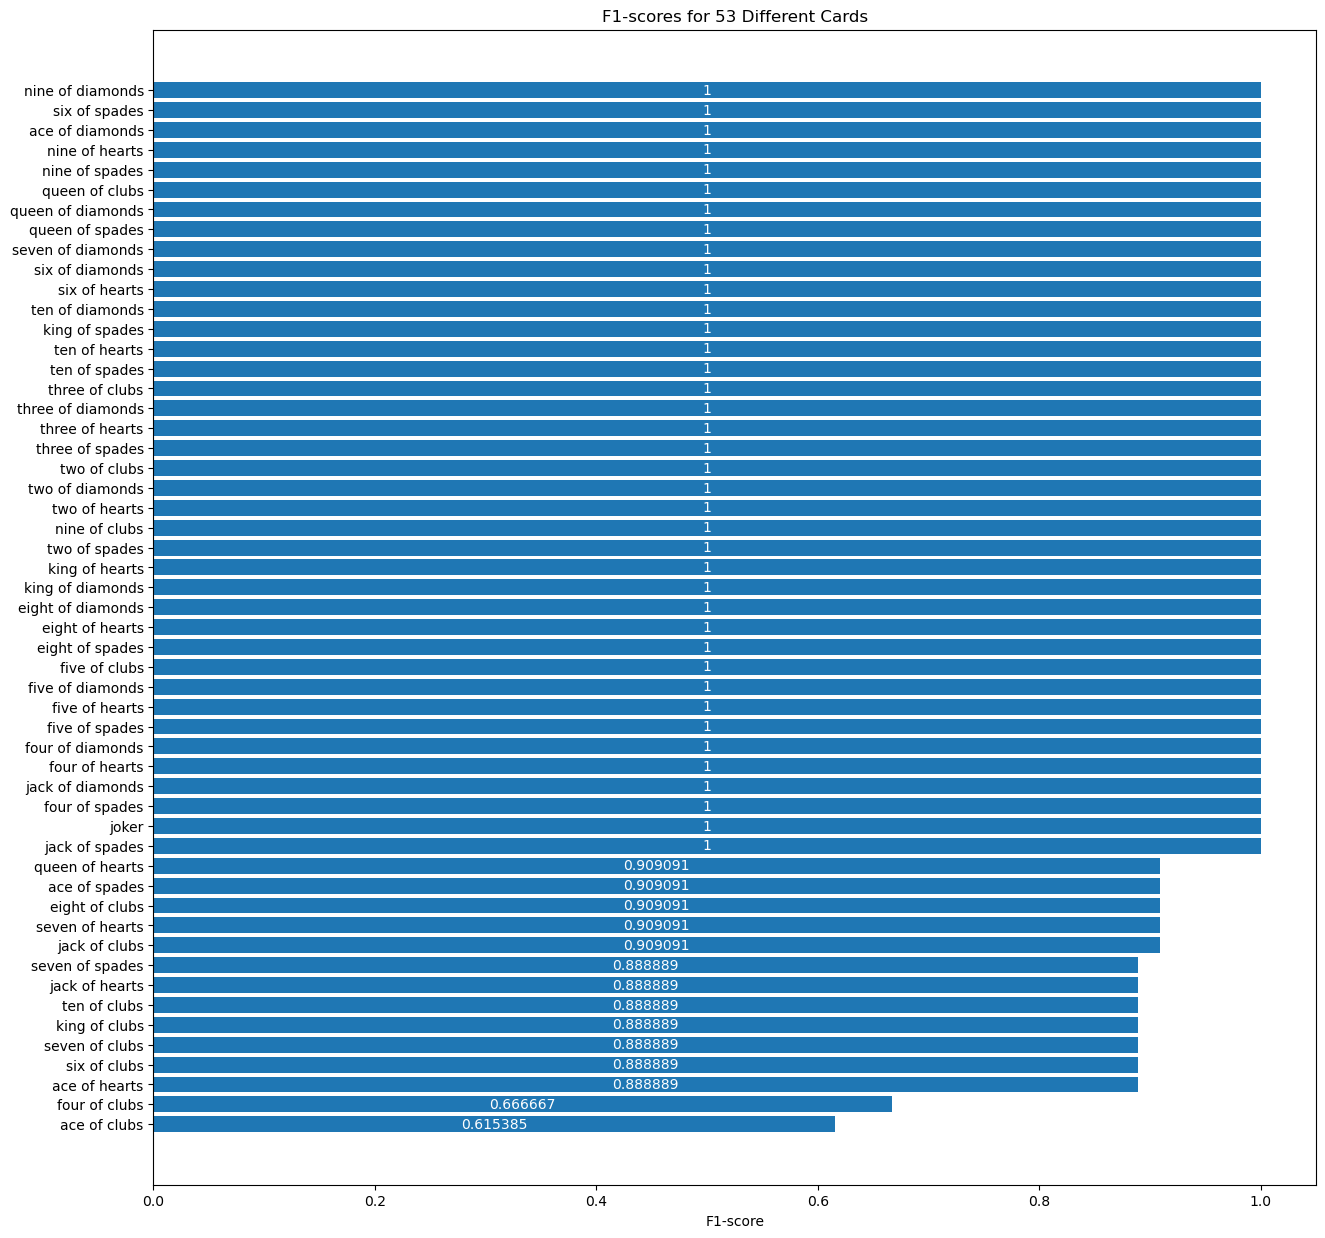

In [55]:
plot_f1_scores_on_every_class_name(f1_scores=f1_scores, figsize=(15, 15))

#### Function to load and prepare images

In [56]:
# Create a function to load and prepare images
def load_and_prep_image(filename, img_shape=200, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channels=3).

  Args:
    filename (str): path to target image
    image_shape (int): height/width dimension of target image size
    scale (bool): scale pixel values from 0-255 to 0-1 or not
  
  Returns:
    Image tensor of shape (img_shape, img_shape, 3)
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3)

  # Resize the image
  # img = tf.image.resize(img, [img_shape, img_shape])
  img = tf.image.resize(img, list(IMAGE_SIZE))

  # Scale? Yes/no
  if scale:
    # rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale images for EfficientNet models in TensorFlow

#### Make predictions on random test images

/Users/rabhaembarak/Downloads/archive (3)/test/two of diamonds/3.jpg
1/1 [==============================] - 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/rabhaembarak/Downloads/archive (3)/test/six of diamonds/2.jpg
1/1 [==============================] - 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/rabhaembarak/Downloads/archive (3)/test/jack of clubs/5.jpg
1/1 [==============================] - 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/rabhaembarak/Downloads/archive (3)/test/ace of diamonds/2.jpg
1/1 [==============================] - 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/rabhaembarak/Downloads/archive (3)/test/seven of spades/4.jpg
1/1 [==============================] - 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/rabhaembarak/Downloads/archive (3)/test/king of hearts/4.jpg
1/1 [==============================] - 0s 27ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


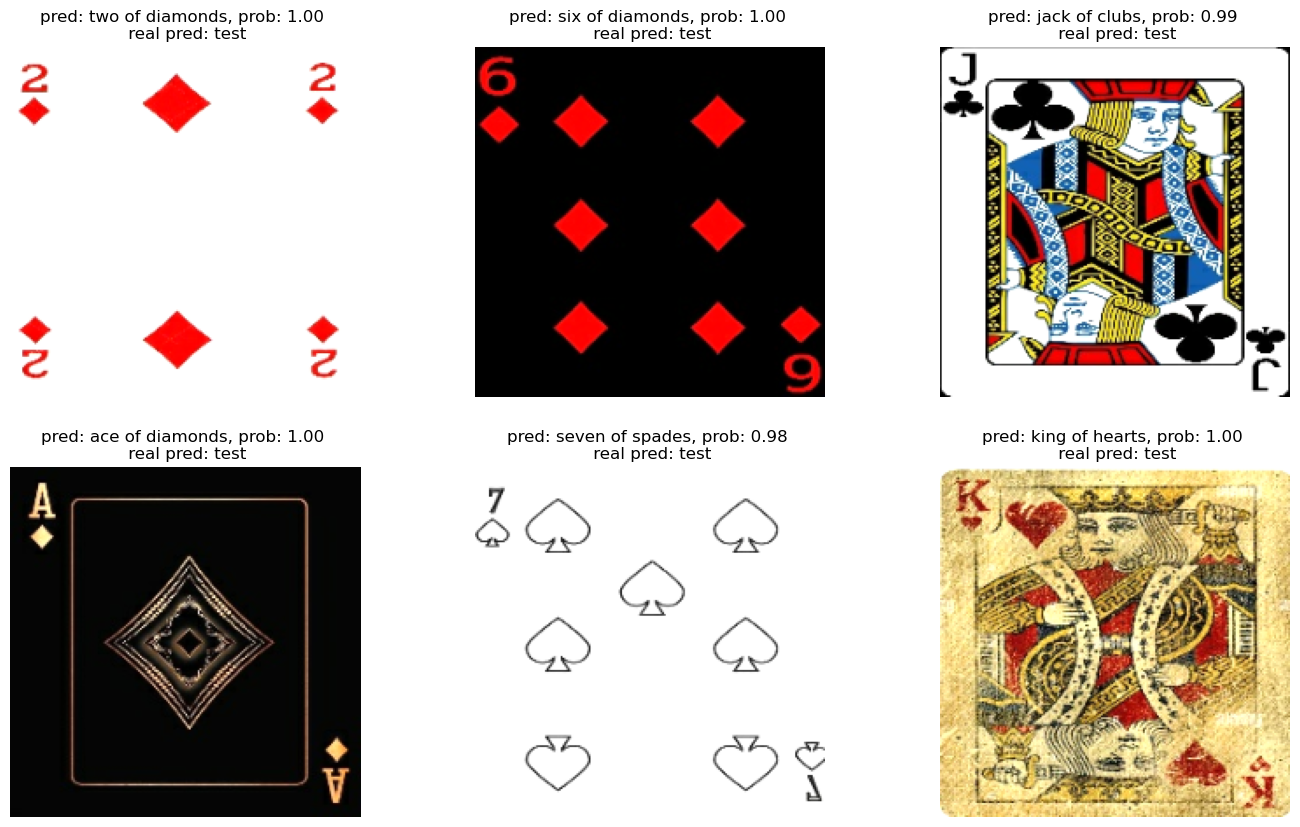

In [59]:
# Make preds on a series of random images
import os
import random

TEST_DIR: str ="/Users/rabhaembarak/Downloads/archive (3)/test"
plt.figure(figsize=(17, 10))
for i in range(6):
  # Choose random image(s) from random class(es)
  filename = random.choice(os.listdir(TEST_DIR))
  folder = TEST_DIR + "/" + filename
  filepath = folder + "/" + random.choice(os.listdir(folder))
  print(filepath)
  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False)
  img_expanded = tf.expand_dims(img, axis=0)
  pred_prob = model.predict(img_expanded)
  pred_class = class_names[pred_prob.argmax()]

  plt.subplot(2, 3, i+1)
  plt.imshow(img/225.)
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f} \n real pred: {folder.split('/')[5]}")
  plt.axis(False);

#### Define test data

In [68]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=TEST_DIR,
    batch_size=BATCH_SIZE,
    label_mode=LABEL_MODE,
    image_size=IMAGE_SIZE,
    seed=RANDOM_SEED,
    shuffle=False
)

Found 265 files belonging to 53 classes.


#### Predictions on Test Data

In [69]:
preds_probs = model.predict(test_data)
preds_probs[:1]

9/9 [==============================] - 2s 236ms/step


array([[9.9967706e-01, 2.3041771e-06, 6.1239507e-06, 1.5056774e-04,
        2.5758203e-08, 2.4335742e-09, 2.5111928e-09, 2.8878370e-08,
        2.6277851e-07, 9.1112451e-09, 1.0251339e-08, 7.2791941e-09,
        2.8867760e-05, 8.8965010e-07, 2.3128764e-07, 5.0795047e-06,
        1.2347000e-06, 9.4552597e-09, 4.2300088e-09, 2.9647451e-08,
        8.7186214e-09, 2.4594630e-05, 3.8344048e-08, 3.3710680e-07,
        6.6824089e-07, 5.3327614e-08, 4.0055007e-10, 1.3537983e-09,
        1.3788523e-09, 2.5084620e-07, 4.8877844e-09, 9.3015879e-09,
        7.2609083e-08, 9.1977992e-05, 1.0046165e-07, 5.4427243e-08,
        4.2108664e-07, 5.1142734e-08, 6.1835719e-09, 6.3243188e-10,
        2.4105449e-09, 2.8904398e-07, 1.2529306e-09, 5.6692691e-09,
        8.3416429e-09, 2.0881284e-06, 5.1413895e-10, 2.4554037e-09,
        3.0813187e-08, 6.1465589e-06, 5.3422977e-09, 4.4272627e-10,
        6.3564656e-09]], dtype=float32)

In [70]:
pred_classes = preds_probs.argmax(axis=1)
pred_classes[:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [71]:
y_labels = []
for images, labels in valid_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1, .... 0, 0], we want the index value where the "1" occurs
y_labels[:10] # look at the first 10 

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

#### Calculate Accuracy for Test Data

In [72]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true=y_labels,
                                  y_pred=pred_classes)
sklearn_accuracy

0.9433962264150944

#### Evaluation Metrics for Test Data

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.83      1.00      0.91         5
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      0.80      0.89         5
           8       0.67      0.80      0.73         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       0.83      1.00      0.91         5
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      0.80      0.89         5
          16       0.83      1.00      0.91         5
          17       0.83    

 # VGG16

#### Load the VGG16 model, add layers, create model and print model summary


In [127]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Set seed
tf.random.set_seed(RANDOM_SEED)

# Load pre-trained VGG16 model (excluding the top fully connected layers)
base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet')

# Set the base model to be non-trainable
base_model.trainable = False

# Define the input layer
input_layer = tf.keras.layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), name="input_layer")

# Data augmentation layer
augmentation_layer = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

# Apply data augmentation to the input layer
x = augmentation_layer(input_layer)

# Pass the augmented input through the base model
x = base_model(x, training=False)

# Global average pooling layer
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Dense layer with ReLU activation
x = tf.keras.layers.Dense(256, activation=tf.keras.activations.relu)(x)

# Batch normalization layer
x = tf.keras.layers.BatchNormalization()(x)

# Output layer with softmax activation
output_layer = tf.keras.layers.Dense(len(class_names), activation=tf.keras.activations.softmax)(x)

# Create the model
model_2 = tf.keras.Model(input_layer, output_layer)

# Print the model summary
model_2.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 200, 200, 3)]     0         
                                                                 
 sequential_15 (Sequential)  (None, 200, 200, 3)       0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling_laye  (None, 512)              0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                           

#### Complie model

In [128]:
# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#### Fit the model ---> Start Training  

In [129]:

EPOCHS = 100

history_3 = model_2.fit(
    train_data,
    epochs=EPOCHS,
    steps_per_epoch=len(train_data),
    validation_data= valid_data,
    validation_steps=int(0.15 * len(valid_data)),
    callbacks=[
        early_stopping_callback,
        reduce_lr_callback
    ]
)


Epoch 1/100
239/239 [==============================] - 689s 3s/step - loss: 2.8433 - accuracy: 0.2272 - val_loss: 2.2030 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 2/100
239/239 [==============================] - 730s 3s/step - loss: 2.2847 - accuracy: 0.3558 - val_loss: 1.4268 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/100
239/239 [==============================] - 793s 3s/step - loss: 2.1168 - accuracy: 0.3882 - val_loss: 1.0704 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/100
239/239 [==============================] - 723s 3s/step - loss: 1.9867 - accuracy: 0.4230 - val_loss: 1.3357 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 5/100
239/239 [==============================] - ETA: 0s - loss: 1.9030 - accuracy: 0.4460
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
239/239 [==============================] - 751s 3s/step - loss: 1.9030 - accuracy: 0.4460 - val_loss: 1.4465 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 6/100
239/239 [==============================] 

#### Evaluate valid and test data

In [130]:
model_2.evaluate(valid_data)

9/9 [==============================] - 18s 2s/step - loss: 1.5917 - accuracy: 0.5321


[1.5917011499404907, 0.5320754647254944]

In [131]:
model_2.evaluate(train_data)

239/239 [==============================] - 627s 3s/step - loss: 1.5320 - accuracy: 0.5657


[1.5320184230804443, 0.5657135248184204]

#### plot  training and validation loss and training and validation accuracy over the epochs

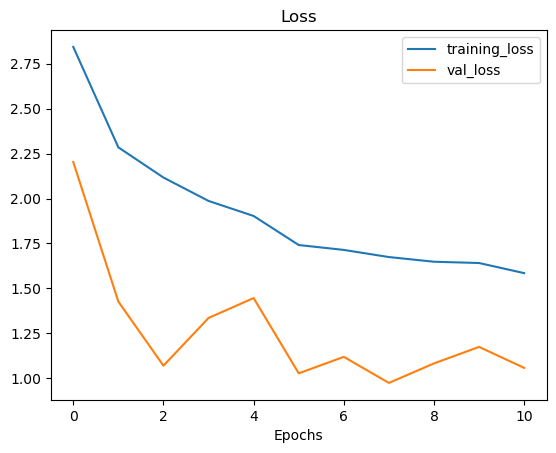

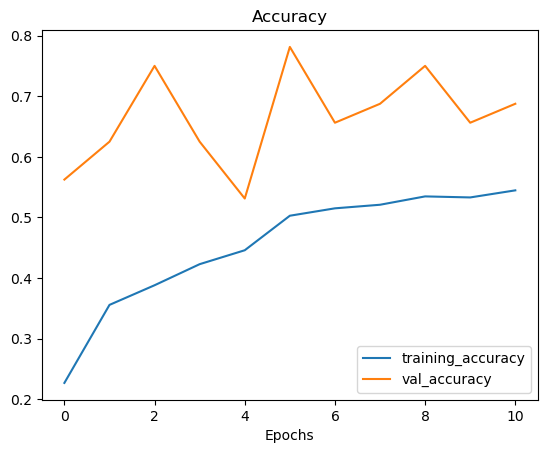

In [133]:
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

accuracy = history_3.history["accuracy"]
val_accuracy = history_3.history["val_accuracy"]

epochs = range(len(history_3.history['loss']))

# Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()


#### Fine-tune: make the base_model trainable while keeping the weights of the first layers frozen


In [138]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# set seed
tf.random.set_seed(RANDOM_SEED)


base_model.trainable = True

for layer in base_model.layers[:-40]:
    layer.trainable = False

In [139]:
model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [140]:
history_3.epoch[-1]

10

#### Continue the training process after fine-tuning

In [141]:

fine_tune_epochs = EPOCHS + 10

history_4 = model_2.fit(
    train_data,
    epochs=fine_tune_epochs,
    validation_data=valid_data,
    steps_per_epoch=len(train_data),
    validation_steps=int(0.15 * len(valid_data)),
    initial_epoch=history_3.epoch[-1],
    callbacks=[
        early_stopping_callback,
        reduce_lr_callback,
    ]
)

Epoch 11/110
239/239 [==============================] - 2486s 10s/step - loss: 1.7982 - accuracy: 0.4803 - val_loss: 1.2541 - val_accuracy: 0.6250 - lr: 1.0000e-04
Epoch 12/110
239/239 [==============================] - 2625s 11s/step - loss: 1.4540 - accuracy: 0.5976 - val_loss: 1.0217 - val_accuracy: 0.7188 - lr: 1.0000e-04
Epoch 13/110
239/239 [==============================] - 2559s 11s/step - loss: 1.2331 - accuracy: 0.6561 - val_loss: 0.8007 - val_accuracy: 0.8438 - lr: 1.0000e-04
Epoch 14/110
239/239 [==============================] - 2960s 12s/step - loss: 1.0996 - accuracy: 0.6965 - val_loss: 0.5700 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 15/110
239/239 [==============================] - 3762s 16s/step - loss: 0.9635 - accuracy: 0.7434 - val_loss: 0.6428 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 16/110
239/239 [==============================] - 12697s 53s/step - loss: 0.8982 - accuracy: 0.7585 - val_loss: 0.3528 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 17/110
23

#### Evaluate performance on valid and train data

In [142]:
model_2.evaluate(valid_data)

9/9 [==============================] - 18s 2s/step - loss: 0.3138 - accuracy: 0.9245


[0.31375497579574585, 0.9245283007621765]

In [143]:
model_2.evaluate(train_data)

239/239 [==============================] - 648s 3s/step - loss: 0.2131 - accuracy: 0.9542


[0.21308405697345734, 0.9542235136032104]

#### Compare initial model with fine-tuned model

In [144]:

# Let's create a function to compare training histories
def compare_historys(original_history, new_history, initial_epochs=5, metric: str = "accuracy"):
  """
  Compares two TensorFlow History objects.
  """
  # Get original history measurements
  acc = original_history.history[metric]
  loss = original_history.history["loss"]

  val_acc = original_history.history[f"val_{metric}"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with new_history metrics
  total_acc = acc + new_history.history[metric]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history[f"val_{metric}"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plot for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  # Make plot for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

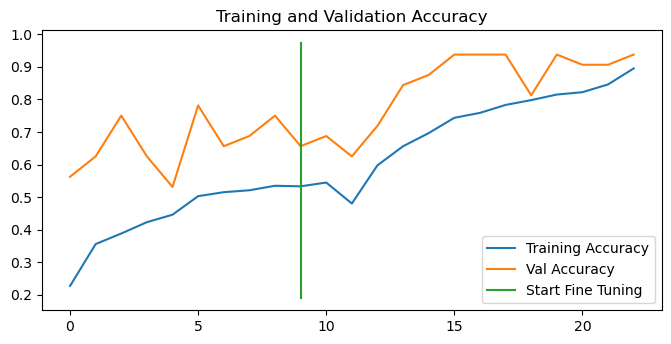

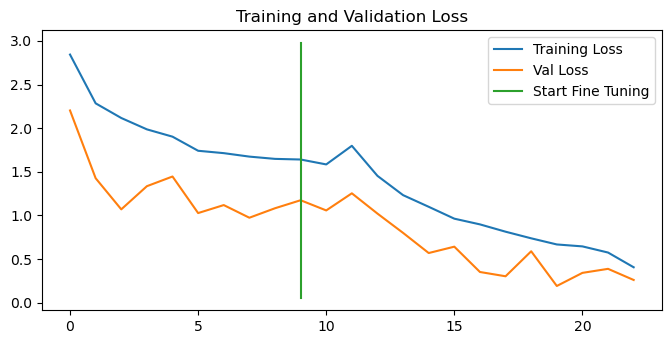

In [145]:
compare_historys(history_3, history_4, initial_epochs=history_3.epoch[-1])

#### Make predictions on validation data

In [146]:
# Make predictions with model
preds_probs = model_2.predict(valid_data)
preds_probs[:1]

9/9 [==============================] - 20s 2s/step


array([[8.70128334e-01, 1.45754078e-04, 8.41461215e-03, 8.87467787e-02,
        3.06293339e-04, 2.45129668e-05, 1.03151586e-04, 1.12343172e-04,
        5.28440636e-04, 4.01937814e-06, 2.64862883e-05, 1.32212750e-04,
        3.44341999e-04, 6.19890343e-05, 1.03001476e-04, 3.02670494e-04,
        1.41747019e-04, 2.86043596e-05, 1.52657006e-03, 5.23131785e-05,
        3.44485021e-03, 1.52575725e-04, 6.66468768e-05, 1.59337725e-02,
        4.55433299e-04, 9.55187443e-06, 3.84556552e-06, 1.04235703e-04,
        1.25580787e-04, 1.94336189e-05, 1.18814296e-06, 1.62153054e-04,
        3.06428155e-05, 2.20234948e-03, 1.62254844e-04, 7.13192509e-04,
        9.18961887e-04, 5.92594952e-05, 8.26533869e-06, 3.23873392e-05,
        3.44041146e-05, 1.19371842e-04, 9.38707490e-06, 4.40875883e-05,
        6.19794591e-05, 8.72689532e-04, 3.15400052e-06, 1.93704385e-04,
        1.66320562e-04, 2.56840792e-03, 7.80022947e-06, 1.14311370e-05,
        6.65009793e-05]], dtype=float32)

In [147]:

# Get the pred classes of each label
pred_classes = preds_probs.argmax(axis=1)
pred_classes[:10]

array([ 0,  0, 18,  0,  0,  1,  1,  1,  1,  1])

In [148]:
# To get our test labels we need to unravel our valid_data BatchDataset
y_labels = []
for images, labels in valid_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1, .... 0, 0], we want the index value where the "1" occurs
y_labels[:10] # look at the first 10 

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

#### Get valid data predicition accuracy 

In [149]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true=y_labels,
                                  y_pred=pred_classes)
sklearn_accuracy

0.9245283018867925

#### Define make_confusion_matrix function

In [150]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to make some changes to our make_confusion_matrix function to ensure the x-labels print vertically
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Changed (plot x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

#### Display the Confusion Matrix

In [151]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20)

#### Display Classification Report

In [152]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       1.00      1.00      1.00         5
           2       1.00      0.80      0.89         5
           3       0.83      1.00      0.91         5
           4       0.83      1.00      0.91         5
           5       0.83      1.00      0.91         5
           6       0.83      1.00      0.91         5
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       0.75      0.60      0.67         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.80      0.80      0.80         5
          17       1.00    

#### F1 Score for each Class

In [153]:
from sklearn.metrics import classification_report
import pandas as pd

def get_f1_score_on_every_class_name(y_labels, y_true, class_names):
    """Return f1 score on every class name as a dataframe

    Args:
        y_labels (_type_): y_true of test_
        y_pred (_type_): predictions list

    Returns:
        pd.DataFrame: f1-scores dataframe on every class name
    """
    classification_report_dict = classification_report(y_labels, y_true, output_dict=True)
    # Create empty dictionary
    class_f1_scores = {}
    # Loop through classification report dictionary items
    for k, v in classification_report_dict.items():
        if k == "accuracy": # stop once we get to accuracy key
            break
        else:
            # Add class names and f1-scores to new dictionary
            class_f1_scores[class_names[int(k)]] = v["f1-score"]
    class_f1_scores

    # Turn f1-scores into dataframe for visualization
    f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                            "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
    return f1_scores

f1_scores = get_f1_score_on_every_class_name(y_labels=y_labels, y_true=pred_classes, class_names=class_names)
f1_scores

class_names  f1-score
52      two of spades  1.000000
29     queen of clubs  1.000000
22   king of diamonds  1.000000
44      ten of spades  1.000000
24     king of spades  1.000000
25      nine of clubs  1.000000
1     ace of diamonds  1.000000
28     nine of spades  1.000000
30  queen of diamonds  1.000000
47    three of hearts  1.000000
31    queen of hearts  1.000000
32    queen of spades  1.000000
34  seven of diamonds  1.000000
35    seven of hearts  1.000000
41       ten of clubs  1.000000
40      six of spades  1.000000
39      six of hearts  1.000000
19     jack of spades  1.000000
17   jack of diamonds  1.000000
51      two of hearts  1.000000
15     four of spades  1.000000
14     four of hearts  1.000000
13   four of diamonds  1.000000
11     five of spades  1.000000
48    three of spades  1.000000
9    five of diamonds  1.000000
8       five of clubs  1.000000
6     eight of hearts  0.909091
3       ace of spades  0.909091
4      eight of clubs  0.909091
5   eight of diamonds  0.909091
42    ten of diamonds  0.909091
38    six of diamonds  0.909091
7     eight of spades  0.909091
27     nine of hearts  0.909091
45     three of clubs  0.909091
20              joker  0.909091
49       two of clubs  0.888889
50    two of diamonds  0.888889
26   nine of diamonds  0.888889
37       six of clubs  0.888889
36    seven of spades  0.888889
23     king of hearts  0.888889
10     five of hearts  0.888889
2       ace of hearts  0.888889
46  three of diamonds  0.800000
16      jack of clubs  0.800000
33     seven of clubs  0.750000
43      ten of hearts  0.750000
18     jack of hearts  0.666667
0        ace of clubs  0.666667
21      king of clubs  0.666667
12      four of clubs  0.666667

In [154]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_f1_scores_on_every_class_name(f1_scores, figsize = (10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
    ax.bar_label(scores, label_type='center', c="white")
    ax.set_yticks(range(len(f1_scores)))
    ax.set_yticklabels(f1_scores["class_names"])
    ax.set_xlabel("F1-score")
    ax.set_title("F1-scores for 53 Different Cards")
    ax.invert_yaxis(); # reverse the order of our plot

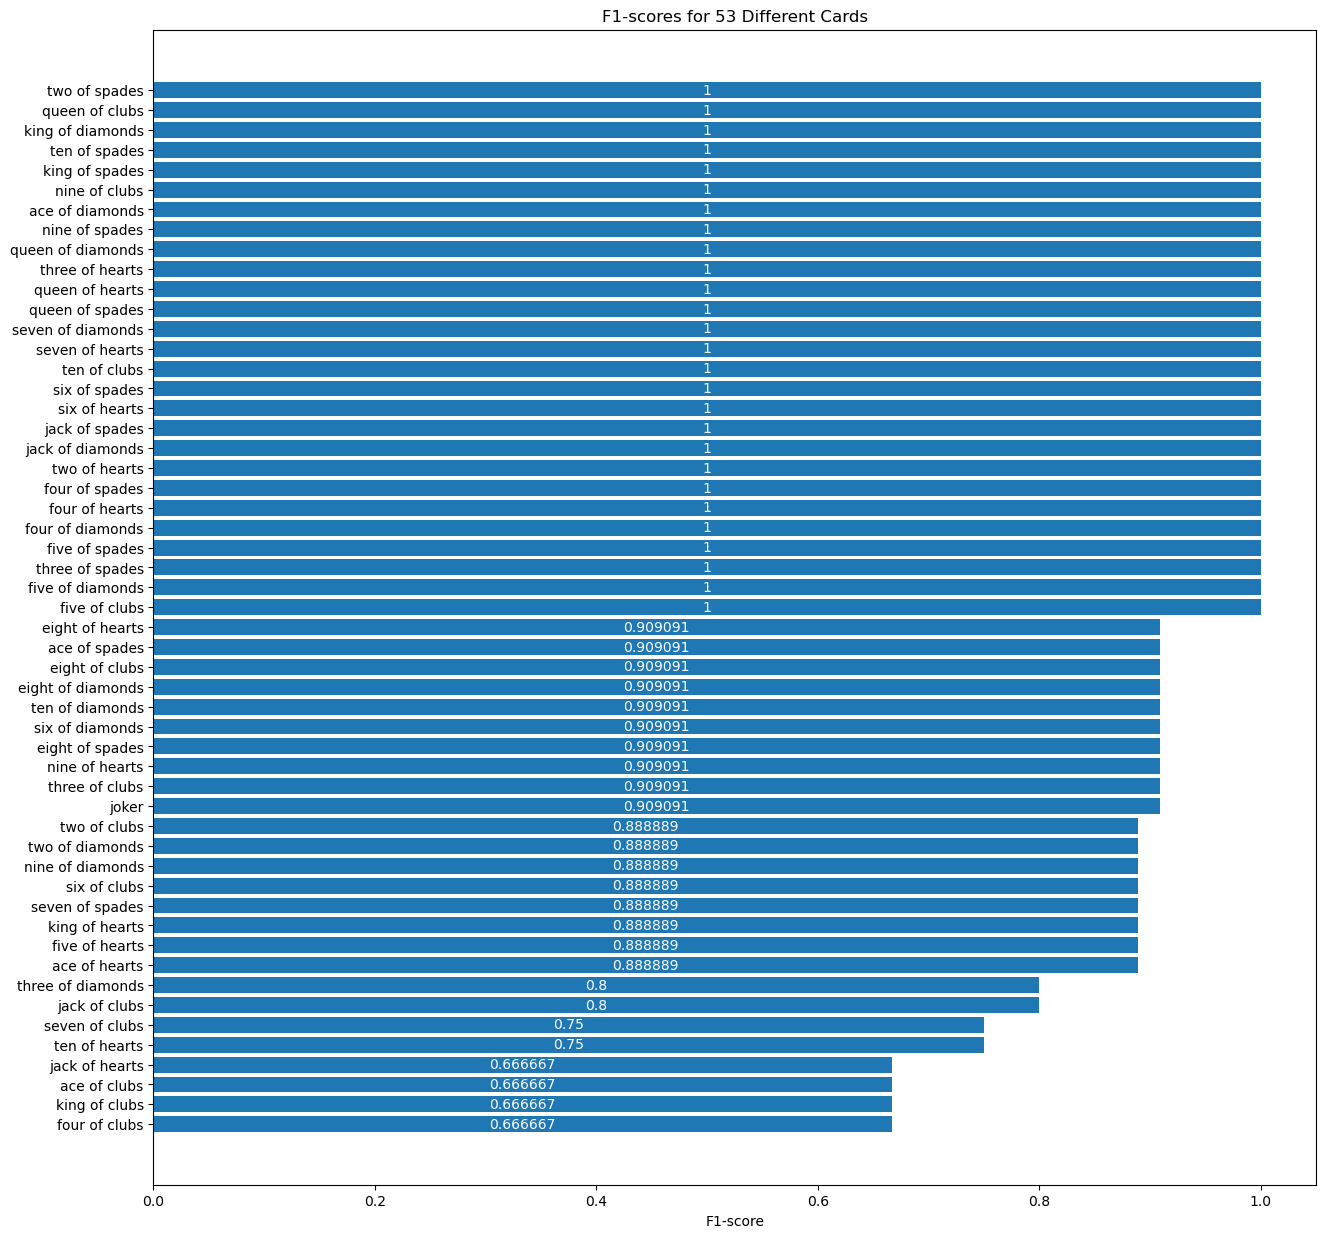

In [155]:
plot_f1_scores_on_every_class_name(f1_scores=f1_scores, figsize=(15, 15))

#### Function to load and prepare images

In [156]:
# Create a function to load and prepare images
def load_and_prep_image(filename, img_shape=200, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channels=3).

  Args:
    filename (str): path to target image
    image_shape (int): height/width dimension of target image size
    scale (bool): scale pixel values from 0-255 to 0-1 or not
  
  Returns:
    Image tensor of shape (img_shape, img_shape, 3)
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3)

  # Resize the image
  # img = tf.image.resize(img, [img_shape, img_shape])
  img = tf.image.resize(img, list(IMAGE_SIZE))

  # Scale? Yes/no
  if scale:
    # rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale images for EfficientNet models in TensorFlow

#### Make predictions on random test images

/Users/rabhaembarak/Downloads/archive (3)/test/six of hearts/2.jpg
1/1 [==============================] - 0s 161ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/rabhaembarak/Downloads/archive (3)/test/king of diamonds/4.jpg
1/1 [==============================] - 0s 87ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/rabhaembarak/Downloads/archive (3)/test/eight of hearts/3.jpg
1/1 [==============================] - 0s 92ms/step
/Users/rabhaembarak/Downloads/archive (3)/test/king of spades/4.jpg
1/1 [==============================] - 0s 88ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/rabhaembarak/Downloads/archive (3)/test/king of hearts/4.jpg
1/1 [==============================] - 0s 88ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/rabhaembarak/Downloads/archive (3)/test/four of spades/2.jpg
1/1 [==============================] - 0s 89ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


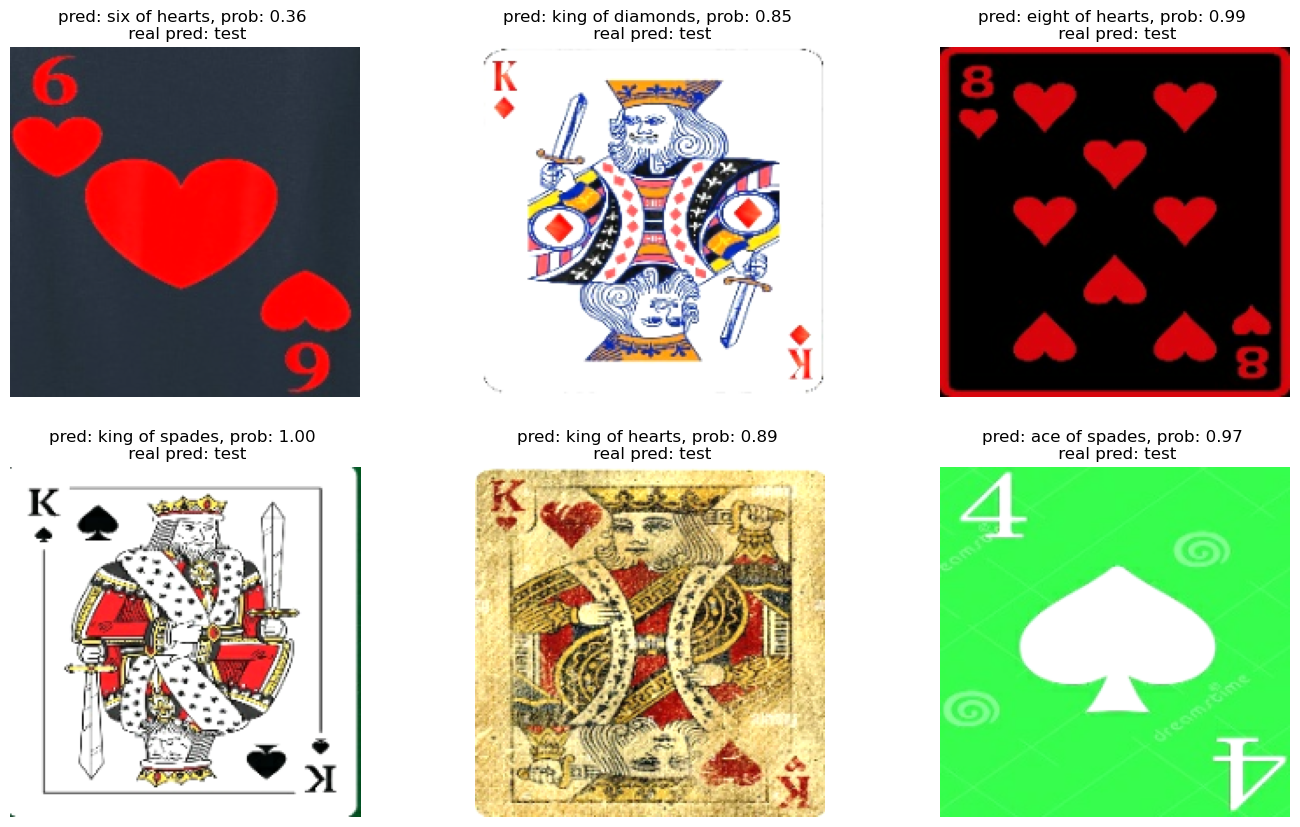

In [157]:
# Make preds on a series of random images
import os
import random

TEST_DIR: str ="/Users/rabhaembarak/Downloads/archive (3)/test"
plt.figure(figsize=(17, 10))
for i in range(6):
  # Choose random image(s) from random class(es)
  filename = random.choice(os.listdir(TEST_DIR))
  folder = TEST_DIR + "/" + filename
  filepath = folder + "/" + random.choice(os.listdir(folder))
  print(filepath)
  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False)
  img_expanded = tf.expand_dims(img, axis=0)
  pred_prob = model_2.predict(img_expanded)
  pred_class = class_names[pred_prob.argmax()]

  plt.subplot(2, 3, i+1)
  plt.imshow(img/225.)
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f} \n real pred: {folder.split('/')[5]}")
  plt.axis(False);

#### Define test data

In [158]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=TEST_DIR,
    batch_size=BATCH_SIZE,
    label_mode=LABEL_MODE,
    image_size=IMAGE_SIZE,
    seed=RANDOM_SEED,
    shuffle=False
)

Found 265 files belonging to 53 classes.


#### Predictions on Test Data

In [165]:
preds_probs = model_2.predict(test_data)
preds_probs[:1]

9/9 [==============================] - 18s 2s/step


array([[8.89236033e-01, 1.75568966e-05, 9.26711582e-05, 4.00609249e-04,
        1.08208344e-03, 2.23928786e-04, 1.91915853e-04, 7.40998803e-05,
        4.06683236e-03, 2.40210738e-06, 5.15132488e-05, 6.42200575e-06,
        5.43773510e-02, 2.10151498e-04, 3.49896436e-04, 7.71269333e-06,
        1.64523881e-04, 4.12045620e-06, 1.49789485e-05, 1.47520941e-05,
        1.02888935e-05, 3.24936147e-04, 2.87865532e-06, 1.76567210e-05,
        1.96231522e-05, 8.47187184e-04, 7.89020578e-06, 3.37927813e-05,
        3.83559818e-05, 2.09247170e-04, 9.19311333e-07, 1.29267244e-06,
        1.84137662e-06, 7.44436309e-03, 8.55227772e-05, 7.13769259e-05,
        6.62270031e-05, 7.99833215e-04, 4.16915418e-06, 2.01188618e-06,
        6.01411466e-06, 7.04079808e-04, 1.67152448e-05, 6.79923323e-06,
        5.13552550e-05, 2.83727814e-02, 1.38508058e-05, 2.05872566e-05,
        7.74900764e-05, 1.01395417e-02, 4.26248653e-06, 3.01074306e-06,
        4.52325276e-06]], dtype=float32)

In [166]:
pred_classes_2 = preds_probs.argmax(axis=1)
pred_classes_2[:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [167]:
y_labels_2 = []
for images, labels in valid_data.unbatch():
  y_labels_2.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1, .... 0, 0], we want the index value where the "1" occurs
y_labels_2[:10] # look at the first 10 

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

#### Calculate Accuracy for Test Data

In [168]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true=y_labels_2,
                                  y_pred=pred_classes_2)
sklearn_accuracy

0.8943396226415095

#### Evaluation Metrics for Test Data

In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels_2,
                            y_pred=pred_classes_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.71      1.00      0.83         5
           4       0.71      1.00      0.83         5
           5       0.80      0.80      0.80         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       0.80      0.80      0.80         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5
          13       0.83      1.00      0.91         5
          14       1.00      1.00      1.00         5
          15       1.00      0.80      0.89         5
          16       0.80      0.80      0.80         5
          17       1.00    

# DenseNet121

In [170]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Set seed
tf.random.set_seed(RANDOM_SEED)

# Load pre-trained DenseNet121 model (excluding the top fully connected layers)
base_model = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet')

# Set the base model to be non-trainable
base_model.trainable = False

# Define the input layer
input_layer = tf.keras.layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), name="input_layer")


# Apply data augmentation to the input layer
x = augmentation_layer(input_layer)

# Pass the augmented input through the base model
x = base_model(x, training=False)

# Global average pooling layer
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Dense layer with ReLU activation
x = tf.keras.layers.Dense(256, activation=tf.keras.activations.relu)(x)

# Batch normalization layer
x = tf.keras.layers.BatchNormalization()(x)

# Output layer with softmax activation
output_layer = tf.keras.layers.Dense(len(class_names), activation=tf.keras.activations.softmax)(x)

# Create the model
model_3 = tf.keras.Model(input_layer, output_layer)

# Print the model summary
model_3.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 200, 200, 3)]     0         
                                                                 
 sequential_15 (Sequential)  (None, 200, 200, 3)       0         
                                                                 
 densenet121 (Functional)    (None, None, None, 1024)  7037504   
                                                                 
 global_average_pooling_laye  (None, 1024)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 dense_38 (Dense)            (None, 256)               262400    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                           

#### Complie the Model

In [208]:

# Compile the model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#### Fit the model ---> Start Training  

In [209]:
# Fit the model

EPOCHS = 100

history_5 = model_3.fit(
    train_data,
    epochs=EPOCHS,
    steps_per_epoch=len(train_data),
    validation_data= valid_data,
    validation_steps=int(0.15 * len(valid_data)),
    callbacks=[
        early_stopping_callback,
        reduce_lr_callback
    ]
)


Epoch 1/100
239/239 [==============================] - 341s 1s/step - loss: 1.6978 - accuracy: 0.4697 - val_loss: 1.3701 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 2/100
239/239 [==============================] - 339s 1s/step - loss: 1.4771 - accuracy: 0.5476 - val_loss: 1.2372 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 3/100
239/239 [==============================] - 342s 1s/step - loss: 1.3595 - accuracy: 0.5824 - val_loss: 1.2342 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/100
239/239 [==============================] - 342s 1s/step - loss: 1.2141 - accuracy: 0.6348 - val_loss: 1.1204 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 5/100
239/239 [==============================] - 346s 1s/step - loss: 1.1349 - accuracy: 0.6590 - val_loss: 1.0792 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 6/100
239/239 [==============================] - 348s 1s/step - loss: 1.0418 - accuracy: 0.6826 - val_loss: 0.8836 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 7/100
239/239 [==============================] - 337

#### Evaluate valid and train results 


In [210]:
model_3.evaluate(valid_data)

9/9 [==============================] - 6s 674ms/step - loss: 1.0126 - accuracy: 0.7396


[1.012609601020813, 0.7396226525306702]

In [211]:
model_3.evaluate(train_data)

239/239 [==============================] - 196s 822ms/step - loss: 0.4292 - accuracy: 0.8698


[0.42921608686447144, 0.8697534203529358]

#### plot  training and validation loss and training and validation accuracy over the epochs

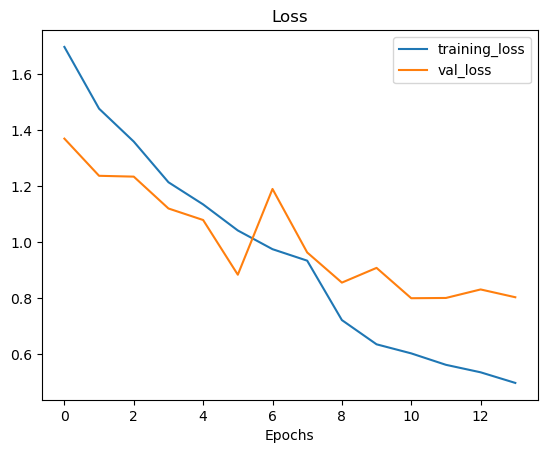

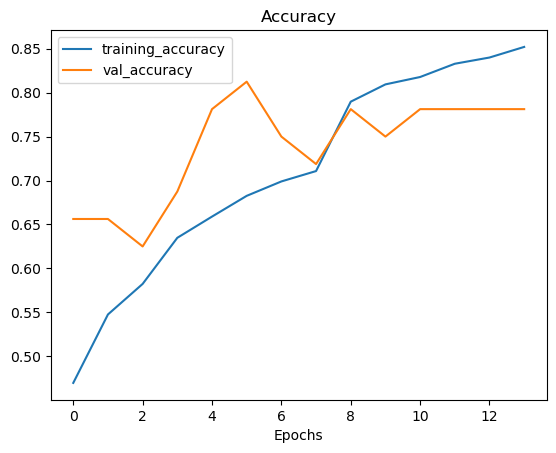

In [212]:
import matplotlib.pyplot as plt
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

accuracy = history_5.history["accuracy"]
val_accuracy = history_5.history["val_accuracy"]

epochs = range(len(history_5.history['loss']))

# Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()


#### Fine-tune: make the base_model trainable while keeping the weights of the first layers frozen

In [213]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# set seed
tf.random.set_seed(RANDOM_SEED)


base_model.trainable = True

for layer in base_model.layers[:-40]:
    layer.trainable = False

In [214]:
model_3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [215]:
history_5.epoch[-1]

13

#### Continue the training process after fine-tuning

In [216]:
fine_tune_epochs = EPOCHS + 10

history_6 = model_3.fit(
    train_data,
    epochs=fine_tune_epochs,
    validation_data=valid_data,
    steps_per_epoch=len(train_data),
    validation_steps=int(0.15 * len(valid_data)),
    initial_epoch=history_5.epoch[-1],
    callbacks=[
        early_stopping_callback,
        reduce_lr_callback,
    ]
)

Epoch 14/110
239/239 [==============================] - 199s 822ms/step - loss: 0.4768 - accuracy: 0.8599 - val_loss: 0.7975 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 15/110
239/239 [==============================] - 202s 847ms/step - loss: 0.4626 - accuracy: 0.8608 - val_loss: 0.7846 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 16/110
239/239 [==============================] - 220s 919ms/step - loss: 0.4569 - accuracy: 0.8650 - val_loss: 0.7910 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 17/110
239/239 [==============================] - 241s 1s/step - loss: 0.4432 - accuracy: 0.8667 - val_loss: 0.7573 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 18/110
239/239 [==============================] - 236s 988ms/step - loss: 0.4053 - accuracy: 0.8780 - val_loss: 0.7364 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 19/110
239/239 [==============================] - 263s 1s/step - loss: 0.4011 - accuracy: 0.8842 - val_loss: 0.7253 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 20/110
239

#### Evaluate performance on valid and train data

In [217]:
model_3.evaluate(valid_data)


9/9 [==============================] - 6s 723ms/step - loss: 0.9966 - accuracy: 0.7585


[0.996646523475647, 0.7584905624389648]

In [218]:
model_3.evaluate(train_data)


239/239 [==============================] - 196s 821ms/step - loss: 0.3215 - accuracy: 0.9006


[0.32147154211997986, 0.9005771279335022]

#### Compare initial model with fine-tuned model

In [219]:

# Let's create a function to compare training histories
def compare_historys(original_history, new_history, initial_epochs=5, metric: str = "accuracy"):
  """
  Compares two TensorFlow History objects.
  """
  # Get original history measurements
  acc = original_history.history[metric]
  loss = original_history.history["loss"]

  val_acc = original_history.history[f"val_{metric}"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with new_history metrics
  total_acc = acc + new_history.history[metric]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history[f"val_{metric}"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plot for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  # Make plot for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

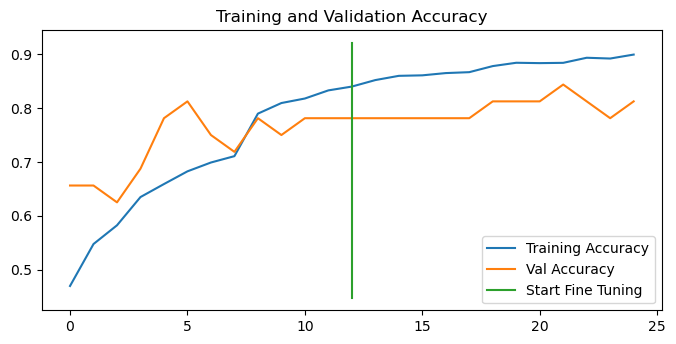

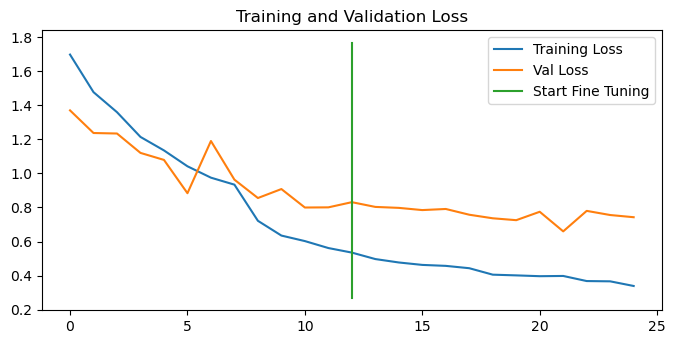

In [220]:
compare_historys(history_5, history_6, initial_epochs=history_5.epoch[-1])

#### Make predictions on validation data

In [221]:
# Make predictions with model
preds_probs = model_3.predict(valid_data)
preds_probs[:1]

9/9 [==============================] - 7s 672ms/step


array([[9.08460200e-01, 2.64734314e-08, 5.60378212e-05, 2.83214380e-03,
        4.86763865e-02, 2.14878312e-07, 9.25778568e-06, 7.89240494e-06,
        3.58671299e-04, 3.29604859e-08, 7.56068112e-05, 8.35431763e-07,
        9.46418755e-03, 6.87689919e-07, 4.89945232e-05, 9.90238693e-03,
        3.16209043e-05, 1.82893978e-09, 8.69165660e-07, 6.01988063e-07,
        1.57185865e-03, 1.95101078e-04, 1.01512717e-06, 5.75146260e-05,
        3.67757764e-07, 3.94249364e-04, 3.44958053e-08, 2.95062523e-06,
        1.06795838e-07, 1.77816290e-03, 1.02500111e-04, 7.21050765e-06,
        7.89339083e-06, 8.17430147e-04, 6.80296125e-07, 1.45949925e-05,
        1.35893761e-05, 2.98546765e-05, 1.94770408e-07, 1.42835256e-06,
        3.70276280e-06, 5.89809672e-04, 2.28627087e-07, 8.31351426e-05,
        1.40313168e-05, 5.18376380e-03, 2.32483600e-07, 6.72031638e-06,
        9.88451182e-04, 4.81006643e-03, 5.37146576e-08, 7.65918344e-07,
        3.39565682e-03]], dtype=float32)

In [222]:
# Get the pred classes of each label
pred_classes = preds_probs.argmax(axis=1)
pred_classes[:10]

array([ 0,  0, 22,  0,  0,  1,  1,  1, 13,  1])

In [223]:
# To get our test labels we need to unravel our valid_data BatchDataset
y_labels = []
for images, labels in valid_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1, .... 0, 0], we want the index value where the "1" occurs
y_labels[:10] # look at the first 10 

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

#### Get valid data predicition accuracy 

In [224]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true=y_labels,
                                  y_pred=pred_classes)
sklearn_accuracy

0.7584905660377359

#### Define make_confusion_matrix function

In [225]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to make some changes to our make_confusion_matrix function to ensure the x-labels print vertically
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Changed (plot x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

#### Display the Confusion Matrix

In [226]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20)

#### Display Classification Report

In [227]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.80      0.80      0.80         5
           2       1.00      0.80      0.89         5
           3       0.71      1.00      0.83         5
           4       0.38      0.60      0.46         5
           5       0.83      1.00      0.91         5
           6       1.00      0.40      0.57         5
           7       1.00      0.80      0.89         5
           8       0.71      1.00      0.83         5
           9       1.00      0.80      0.89         5
          10       0.80      0.80      0.80         5
          11       0.71      1.00      0.83         5
          12       0.50      0.40      0.44         5
          13       0.83      1.00      0.91         5
          14       1.00      0.60      0.75         5
          15       1.00      1.00      1.00         5
          16       0.67      0.80      0.73         5
          17       0.67    

#### Display Classification Report

In [228]:
from sklearn.metrics import classification_report
import pandas as pd

def get_f1_score_on_every_class_name(y_labels, y_true, class_names):
    """Return f1 score on every class name as a dataframe

    Args:
        y_labels (_type_): y_true of test_
        y_pred (_type_): predictions list

    Returns:
        pd.DataFrame: f1-scores dataframe on every class name
    """
    classification_report_dict = classification_report(y_labels, y_true, output_dict=True)
    # Create empty dictionary
    class_f1_scores = {}
    # Loop through classification report dictionary items
    for k, v in classification_report_dict.items():
        if k == "accuracy": # stop once we get to accuracy key
            break
        else:
            # Add class names and f1-scores to new dictionary
            class_f1_scores[class_names[int(k)]] = v["f1-score"]
    class_f1_scores

    # Turn f1-scores into dataframe for visualization
    f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                            "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
    return f1_scores

f1_scores = get_f1_score_on_every_class_name(y_labels=y_labels, y_true=pred_classes, class_names=class_names)
f1_scores

class_names  f1-score
47    three of hearts  1.000000
27     nine of hearts  1.000000
29     queen of clubs  1.000000
34  seven of diamonds  1.000000
15     four of spades  1.000000
13   four of diamonds  0.909091
28     nine of spades  0.909091
51      two of hearts  0.909091
5   eight of diamonds  0.909091
48    three of spades  0.909091
32    queen of spades  0.888889
42    ten of diamonds  0.888889
44      ten of spades  0.888889
52      two of spades  0.888889
9    five of diamonds  0.888889
7     eight of spades  0.888889
49       two of clubs  0.888889
2       ace of hearts  0.888889
11     five of spades  0.833333
35    seven of hearts  0.833333
8       five of clubs  0.833333
3       ace of spades  0.833333
24     king of spades  0.833333
1     ace of diamonds  0.800000
38    six of diamonds  0.800000
26   nine of diamonds  0.800000
10     five of hearts  0.800000
39      six of hearts  0.769231
50    two of diamonds  0.750000
21      king of clubs  0.750000
30  queen of diamonds  0.750000
14     four of hearts  0.750000
43      ten of hearts  0.750000
16      jack of clubs  0.727273
46  three of diamonds  0.727273
45     three of clubs  0.727273
0        ace of clubs  0.727273
31    queen of hearts  0.727273
20              joker  0.714286
40      six of spades  0.666667
18     jack of hearts  0.600000
36    seven of spades  0.571429
33     seven of clubs  0.571429
6     eight of hearts  0.571429
22   king of diamonds  0.526316
17   jack of diamonds  0.500000
19     jack of spades  0.500000
4      eight of clubs  0.461538
37       six of clubs  0.444444
12      four of clubs  0.444444
25      nine of clubs  0.400000
23     king of hearts  0.333333
41       ten of clubs  0.333333

In [229]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_f1_scores_on_every_class_name(f1_scores, figsize = (10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
    ax.bar_label(scores, label_type='center', c="white")
    ax.set_yticks(range(len(f1_scores)))
    ax.set_yticklabels(f1_scores["class_names"])
    ax.set_xlabel("F1-score")
    ax.set_title("F1-scores for 53 Different Cards")
    ax.invert_yaxis(); # reverse the order of our plot

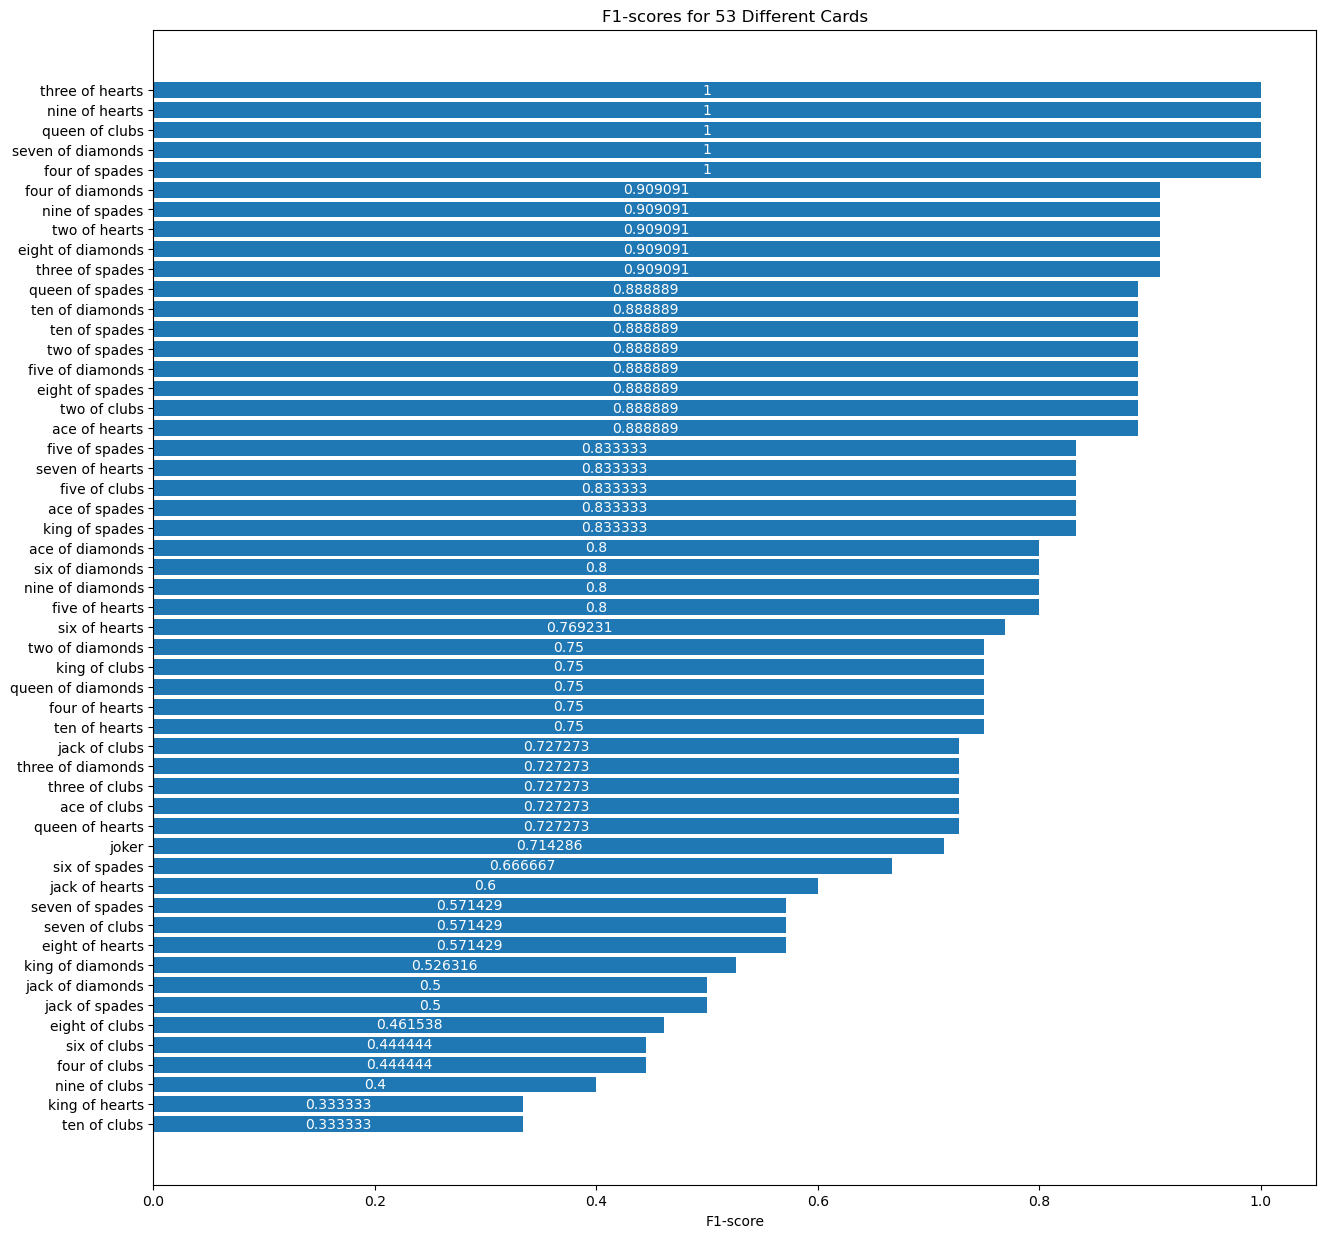

In [230]:
plot_f1_scores_on_every_class_name(f1_scores=f1_scores, figsize=(15, 15))

#### Function to load and prepare images

In [231]:
# Create a function to load and prepare images
def load_and_prep_image(filename, img_shape=200, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channels=3).

  Args:
    filename (str): path to target image
    image_shape (int): height/width dimension of target image size
    scale (bool): scale pixel values from 0-255 to 0-1 or not
  
  Returns:
    Image tensor of shape (img_shape, img_shape, 3)
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3)

  # Resize the image
  # img = tf.image.resize(img, [img_shape, img_shape])
  img = tf.image.resize(img, list(IMAGE_SIZE))

  # Scale? Yes/no
  if scale:
    # rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale images for EfficientNet models in TensorFlow

#### Make predictions on random test images

/Users/rabhaembarak/Downloads/archive (3)/test/jack of hearts/2.jpg
1/1 [==============================] - 1s 732ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/rabhaembarak/Downloads/archive (3)/test/five of diamonds/3.jpg
1/1 [==============================] - 0s 50ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/rabhaembarak/Downloads/archive (3)/test/four of hearts/3.jpg
1/1 [==============================] - 0s 48ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/rabhaembarak/Downloads/archive (3)/test/jack of clubs/2.jpg
1/1 [==============================] - 0s 50ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/rabhaembarak/Downloads/archive (3)/test/eight of spades/5.jpg
1/1 [==============================] - 0s 50ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/rabhaembarak/Downloads/archive (3)/test/seven of hearts/1.jpg
1/1 [==============================] - 0s 49ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


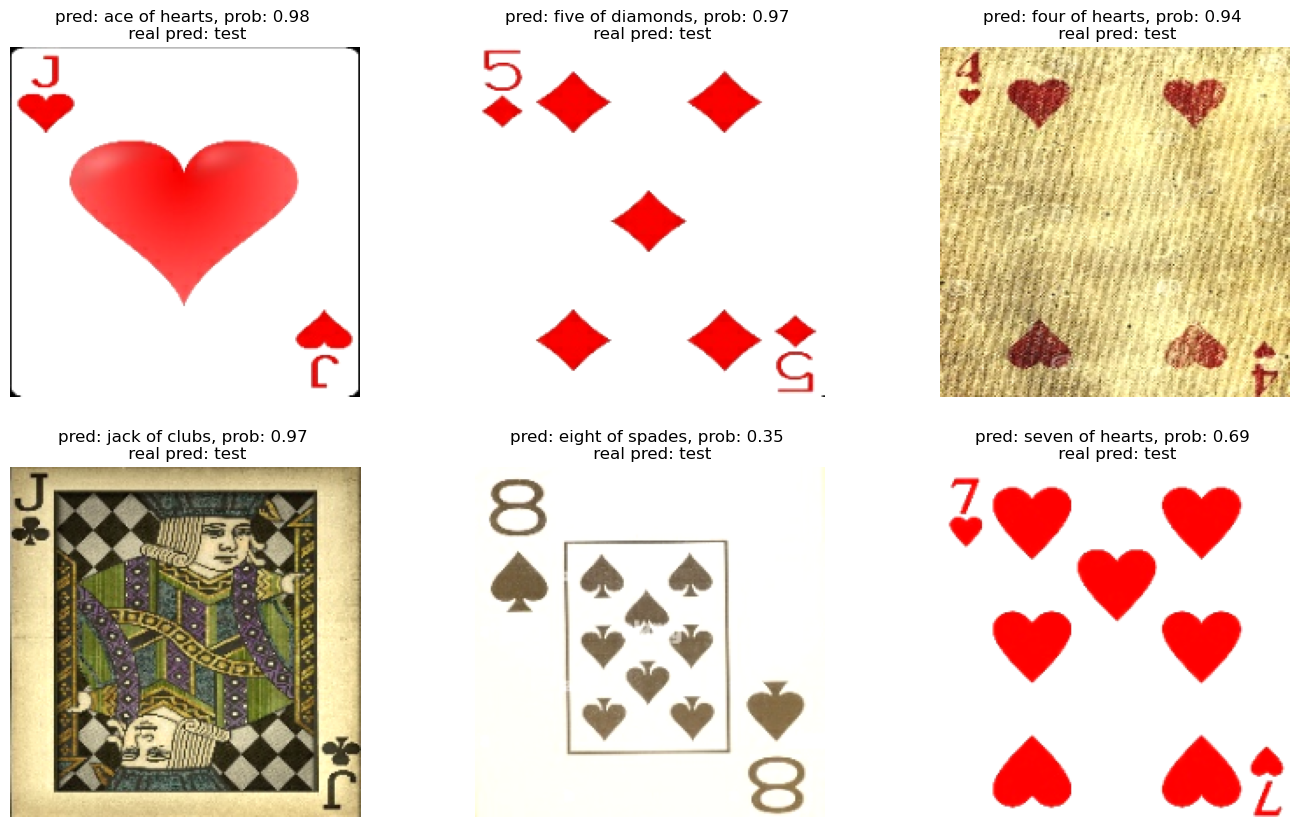

In [232]:
# Make preds on a series of random images
import os
import random

TEST_DIR: str ="/Users/rabhaembarak/Downloads/archive (3)/test"
plt.figure(figsize=(17, 10))
for i in range(6):
  # Choose random image(s) from random class(es)
  filename = random.choice(os.listdir(TEST_DIR))
  folder = TEST_DIR + "/" + filename
  filepath = folder + "/" + random.choice(os.listdir(folder))
  print(filepath)
  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False)
  img_expanded = tf.expand_dims(img, axis=0)
  pred_prob = model_3.predict(img_expanded)
  pred_class = class_names[pred_prob.argmax()]

  plt.subplot(2, 3, i+1)
  plt.imshow(img/225.)
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f} \n real pred: {folder.split('/')[5]}")
  plt.axis(False);

#### Define test_data

In [233]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=TEST_DIR,
    batch_size=BATCH_SIZE,
    label_mode=LABEL_MODE,
    image_size=IMAGE_SIZE,
    seed=RANDOM_SEED,
    shuffle=False
)

Found 265 files belonging to 53 classes.


#### Predictions on Test Data

In [234]:
preds_probs_ = model_3.predict(test_data)
preds_probs[:1]

9/9 [==============================] - 6s 623ms/step


array([[9.08460200e-01, 2.64734314e-08, 5.60378212e-05, 2.83214380e-03,
        4.86763865e-02, 2.14878312e-07, 9.25778568e-06, 7.89240494e-06,
        3.58671299e-04, 3.29604859e-08, 7.56068112e-05, 8.35431763e-07,
        9.46418755e-03, 6.87689919e-07, 4.89945232e-05, 9.90238693e-03,
        3.16209043e-05, 1.82893978e-09, 8.69165660e-07, 6.01988063e-07,
        1.57185865e-03, 1.95101078e-04, 1.01512717e-06, 5.75146260e-05,
        3.67757764e-07, 3.94249364e-04, 3.44958053e-08, 2.95062523e-06,
        1.06795838e-07, 1.77816290e-03, 1.02500111e-04, 7.21050765e-06,
        7.89339083e-06, 8.17430147e-04, 6.80296125e-07, 1.45949925e-05,
        1.35893761e-05, 2.98546765e-05, 1.94770408e-07, 1.42835256e-06,
        3.70276280e-06, 5.89809672e-04, 2.28627087e-07, 8.31351426e-05,
        1.40313168e-05, 5.18376380e-03, 2.32483600e-07, 6.72031638e-06,
        9.88451182e-04, 4.81006643e-03, 5.37146576e-08, 7.65918344e-07,
        3.39565682e-03]], dtype=float32)

In [235]:
pred_classes_3 = preds_probs.argmax(axis=1)
pred_classes_3[:10]

array([ 0,  0, 22,  0,  0,  1,  1,  1, 13,  1])

In [236]:
y_labels_3 = []
for images, labels in valid_data.unbatch():
  y_labels_3.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1, .... 0, 0], we want the index value where the "1" occurs
y_labels_3[:10] # look at the first 10 

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

#### Calculate Accuracy for Test Data

In [237]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true=y_labels_3,
                                  y_pred=pred_classes_3)
sklearn_accuracy

0.7584905660377359

#### Evaluation Metrics for Test Data

In [238]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels_3,
                            y_pred=pred_classes_3))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.80      0.80      0.80         5
           2       1.00      0.80      0.89         5
           3       0.71      1.00      0.83         5
           4       0.38      0.60      0.46         5
           5       0.83      1.00      0.91         5
           6       1.00      0.40      0.57         5
           7       1.00      0.80      0.89         5
           8       0.71      1.00      0.83         5
           9       1.00      0.80      0.89         5
          10       0.80      0.80      0.80         5
          11       0.71      1.00      0.83         5
          12       0.50      0.40      0.44         5
          13       0.83      1.00      0.91         5
          14       1.00      0.60      0.75         5
          15       1.00      1.00      1.00         5
          16       0.67      0.80      0.73         5
          17       0.67    

# PERFORMANCE EVALUATION


### Comparing Train, Validation and Test Accuracies of Each Model

In [292]:
### Create a DataFrame to store the results

data = {
    'Model': ['EfficientNetB0', 'VGG16', 'DenseNet121'],
    'Train Accuracy': [0.9584207534790039, 0.9542235136032104, 0.9005771279335022],
    'Validation Accuracy': [0.9622641801834106, 0.9245283007621765, 0.7584905624389648],
    'Test Accuracy': [0.9433962264150944, 0.8943396226415095, 0.7584905660377359],
   
}

df = pd.DataFrame(data)
df

Model  Train Accuracy  Validation Accuracy  Test Accuracy
0  EfficientNetB0        0.958421             0.962264       0.943396
1           VGG16        0.954224             0.924528       0.894340
2     DenseNet121        0.900577             0.758491       0.758491

### Comparing Test Results of Each Model Based on Different Evaluation Metrics

In [296]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


accuracy_EfficientNet = 0.9433962264150944
f1_score_EfficientNet = 0.94
precision_EfficientNet = 0.95
recall_EfficientNet = 0.94


accuracy_VGG16 = 0.8943396226415095
f1_score_VGG16 = 0.89
precision_VGG16 = 0.91
recall_VGG16 = 0.89


accuracy_DenseNet = 0.7584905660377359
f1_score_DenseNet = 0.75
precision_DenseNet = 0.81
recall_DenseNet = 0.76


# Create a DataFrame to store the results
data = {
    'Model': ['EfficientNetB0', 'VGG16', 'DenseNet121'],
    'Accuracy': [accuracy_EfficientNet, accuracy_VGG16, accuracy_DenseNet],
    'F1 Score': [f1_score_EfficientNet, f1_score_VGG16, f1_score_DenseNet],
    'Precision': [precision_EfficientNet, precision_VGG16, precision_DenseNet],
    'Recall': [recall_EfficientNet, recall_VGG16, recall_DenseNet]
}
df = pd.DataFrame(data)

# Find the maximum value in each column
max_values = df.iloc[:, 1:].max()

# Create a new row with the maximum values
max_row = pd.DataFrame({'Model': 'Maximum_Test', 'Accuracy': max_values['Accuracy'], 'F1 Score': max_values['F1 Score'], 'Precision': max_values['Precision'], 'Recall': max_values['Recall']}, index=[0])

# Append the new row to the DataFrame
df = df.append(max_row, ignore_index=True)
df



/var/folders/9x/tfytfq4n19x4jdll31tlpnkr0000gn/T/ipykernel_6419/3684995741.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(max_row, ignore_index=True)


Model  Accuracy  F1 Score  Precision  Recall
0  EfficientNetB0  0.943396      0.94       0.95    0.94
1           VGG16  0.894340      0.89       0.91    0.89
2     DenseNet121  0.758491      0.75       0.81    0.76
3    Maximum_Test  0.943396      0.94       0.95    0.94

#### Saving The 3 Models to a .h5 File 

In [ ]:
model.save("EfficientNetB0.h5")

In [298]:
model_2.save('VGG16.h5')

In [299]:
model_3.save('DenseNet121.h5')